##

### Walk through the data directories

In [1]:
import os

In [2]:
dataset_path= "data"
dp=[]

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    
    #ensure wer'not at root level
    if dirpath is not dataset_path:
        print("Directory name: "+dirpath)
        dirpath_components = dirpath.split('/')
        label=dirpath_components[-1]
        print("Etiqueta: "+label)
        
        for f in filenames:
            print(f)
            file_path= os.path.join(dirpath, f)
            dp.append(file_path)
            
dp

Directory name: data/A
Etiqueta: A
A3.m4a
A2.m4a
A1.m4a


['data/A/A3.m4a', 'data/A/A2.m4a', 'data/A/A1.m4a']

### READ AN AUDIO FILE

In [3]:
import librosa 

In [4]:
#sr=44100
sr=22500

In [5]:
open_one_file=dp[1]

signal, sr=librosa.load(open_one_file, sr=sr)

/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [6]:
import IPython.display as ipd
ipd.Audio(open_one_file)

### KNOW IT'S FUNDAMENTAL PROPERTIES: Sample-rate frecuency and Time duration

In [7]:
print(f'Signal segment: {signal[100:104]}')
print(f'Sahpe of signal: {signal.shape}')
print(f'Sample Rate: {sr}')

Signal segment: [ 1.5669233e-05  7.7999323e-07 -2.0226610e-06  7.0777578e-06]
Sahpe of signal: (33960,)
Sample Rate: 22500


### VISUALIZE THE WAVE FORM

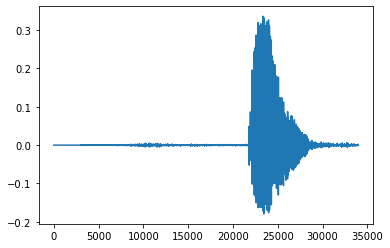

In [8]:
import matplotlib.pyplot as plt
plt.plot(signal)

### GET THE FUNDAMENTAL FRECUENCIES: FAST FOURIER TRANSFORM

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.legend(*args, **kwargs)>

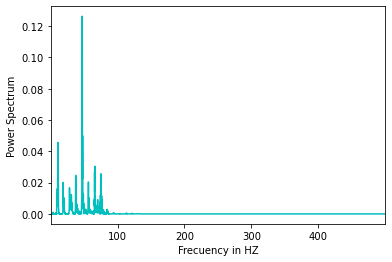

In [9]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.001


#Compute the Fast Fourier Transform (FFT)
n =len(signal)
fhat= np.fft.fft(signal,n) #Fourier coefficients: complex values Fourier coefficients: What are the MAGNITUD and the PHASE of the sin and cosine components of INCREASSING FRECUANCY that you would have to add up (+) to get the 'signal'
#Compute the Power spectrum PSD
PSD =fhat * np.conj(fhat)/n 
freq = (1/(dt*n)) * np.arange(n) 
L = np.arange(1,np.floor(n/2), dtype='int') #Only plt the first half


plt.plot(freq[L],PSD[L],color='c', label='FFT')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('Frecuency in HZ')
plt.ylabel('Power Spectrum')
plt.legend

### GET SPECTROGRAMS

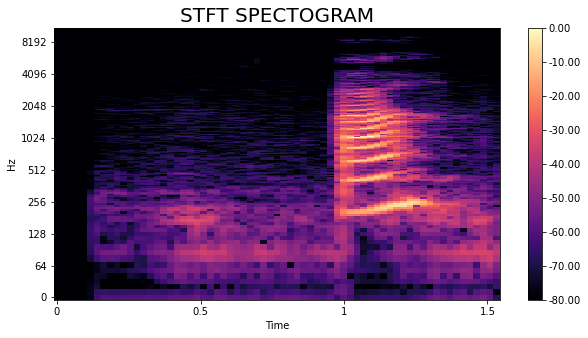

In [10]:
import numpy as np
import librosa.display

D = librosa.stft(signal)
S_db= librosa.amplitude_to_db(np.abs(D), ref=np.max)


fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('STFT SPECTOGRAM', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

### GET Mel Frecuencies Cepstral Coefficients : MFCCs

/tmp/ipykernel_29021/2313922171.py:1: FutureWarning: Pass y=[-1.4955710e-05 -1.5418880e-05 -1.1598984e-06 ...  1.7446683e-03
  1.8776242e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S=librosa.feature.melspectrogram(signal, sr=sr, n_mels=430,)


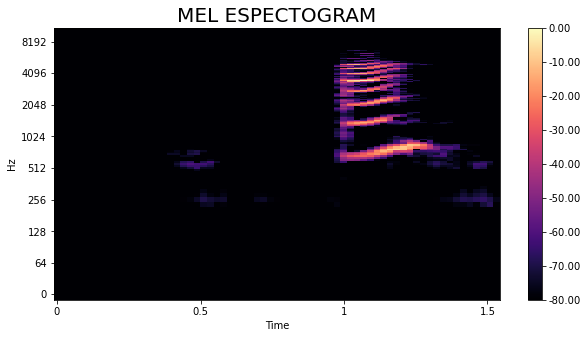

In [11]:
S=librosa.feature.melspectrogram(signal, sr=sr, n_mels=430,)
S_db_mel= librosa.amplitude_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('MEL ESPECTOGRAM', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')